# Contents
## 01. Import Libraries and Data
## 02. Data Prep for Regression Analysis
## 03. Regression Analysis
    Train Set
    Test Set
    Results
## 04. Export Scatterplots

# 01. Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# Assign path to str
path = r'/Users/allyfornino/Documents/11-2022 Gun Violence Analysis/'

In [5]:
# Import clean data as df
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'clean_gun_violence_data.csv'))

In [6]:
df.head()

,Unnamed: 0,incident_id,date,state,city_or_county,latitude,longitude,no_injuries_or_deaths,injuries,n_injured,deaths,n_killed,n_guns_involved,stolen_gun_involved,n_participants,all_adults,adult_participant,teen_participant,child_participant,all_female_participants,all_male_participants,mixed_gender_participants,all_victims,all_suspects,suspects_and_victims,mass_shooting_flag,drive_by_flag,domestic_violence_flag,armed_robbery_flag,gang_involvement_flag,drug_involvement_flag,accidental_flag,self_inflicted_flag
0,32,481229,2013-03-07,Mississippi,Jackson,32.2649,-90.2141,True,True,2,True,2,1.0,Unknown,4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,56,485746,2013-04-22,Louisiana,Harvey,29.8736,-90.0568,True,True,5,True,0,3.0,Unknown,9,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,62,485979,2013-04-28,Tennessee,Jackson,35.6141,-88.8150,True,True,2,True,2,2.0,Unknown,6,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,78,873575,2013-05-18,New York,Jamaica,40.6730,-73.7881,True,True,0,True,1,1.0,Unknown,2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,79,486611,2013-05-18,Virginia,Victoria,37.0177,-78.1562,True,True,4,True,0,1.0,Unknown,5,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [7]:
df = df.drop(columns = ['Unnamed: 0'])
df.head()

,incident_id,date,state,city_or_county,latitude,longitude,no_injuries_or_deaths,injuries,n_injured,deaths,n_killed,n_guns_involved,stolen_gun_involved,n_participants,all_adults,adult_participant,teen_participant,child_participant,all_female_participants,all_male_participants,mixed_gender_participants,all_victims,all_suspects,suspects_and_victims,mass_shooting_flag,drive_by_flag,domestic_violence_flag,armed_robbery_flag,gang_involvement_flag,drug_involvement_flag,accidental_flag,self_inflicted_flag
0,481229,2013-03-07,Mississippi,Jackson,32.2649,-90.2141,True,True,2,True,2,1.0,Unknown,4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,485746,2013-04-22,Louisiana,Harvey,29.8736,-90.0568,True,True,5,True,0,3.0,Unknown,9,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,485979,2013-04-28,Tennessee,Jackson,35.6141,-88.8150,True,True,2,True,2,2.0,Unknown,6,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,873575,2013-05-18,New York,Jamaica,40.6730,-73.7881,True,True,0,True,1,1.0,Unknown,2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,486611,2013-05-18,Virginia,Victoria,37.0177,-78.1562,True,True,4,True,0,1.0,Unknown,5,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


# 02. Data Prep for Regression Analysis

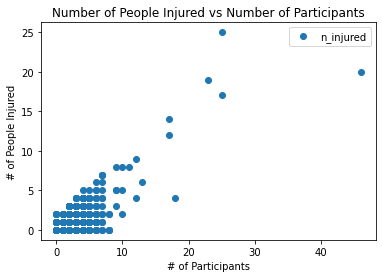

In [8]:
# Scatterplot for chosen variables
df.plot(x = 'n_participants', y = 'n_injured', style = 'o')
plt.title('Number of People Injured vs Number of Participants')
plt.xlabel('# of Participants')
plt.ylabel('# of People Injured')
plt.show()

In [9]:
# Reshape variables into arrays and put into separate objects
x = df['n_participants'].values.reshape(-1, 1)
y = df['n_injured'].values.reshape(-1, 1)

In [10]:
x

array([[4],
       [9],
       [6],
       ...,
       [0],
       [2],
       [0]])

In [11]:
y

array([[2],
       [5],
       [2],
       ...,
       [0],
       [0],
       [0]])

In [12]:
# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# 03. Regression Analysis

### Hypothesis: The higher the number of participants, the higher the number of people injured.

In [13]:
# Create regression object
regression = LinearRegression()

In [14]:
# Fit regression object onto training set
regression.fit(x_train, y_train)

LinearRegression()

## Training Set

In [15]:
# Predict values of y using x
y_predicted_train = regression.predict(x_train)

In [16]:
# Summary stats
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [17]:
# Print summary stats
print('Slope: ', regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope:  [[0.45547612]]
Mean squared error:  0.5758262779369584
R2 score:  0.5035996607389275


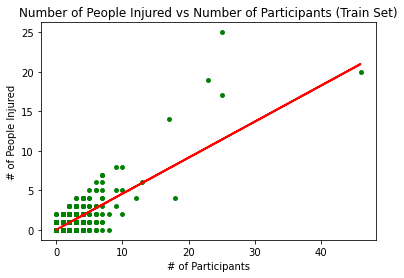

In [18]:
# Visualizing training set results
train = plt
train.scatter(x_train, y_train, color = 'green', s = 15)
train.plot(x_train, y_predicted_train, color = 'red', linewidth = 2)
train.title('Number of People Injured vs Number of Participants (Train Set)')
train.xlabel('# of Participants')
train.ylabel('# of People Injured')
train.show()

## Test Set

In [19]:
# Predict values of y using x
y_predicted = regression.predict(x_test)

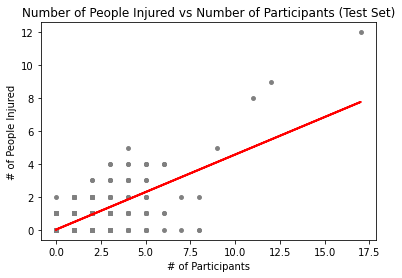

In [20]:
# Create plot displaying regression line from model on test set
test = plt
test.scatter(x_test, y_test, color = 'gray', s = 15)
test.plot(x_test, y_predicted, color = 'red', linewidth = 2)
test.title('Number of People Injured vs Number of Participants (Test Set)')
test.xlabel('# of Participants')
test.ylabel('# of People Injured')
test.show()

In [21]:
# Objects for model summary stats
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [22]:
# Print model summary stats
print('Slope: ', regression.coef_)
print('Mean Squared Error: ', rmse)
print('R2 Score: ', r2)

Slope:  [[0.45547612]]
Mean Squared Error:  0.5265010433788146
R2 Score:  0.2596316677693439


In [23]:
pd.set_option('display.max_rows', None)

In [24]:
y_predicted

array([[0.0226125 ],
       [0.0226125 ],
       [0.47808862],
       ...,
       [0.0226125 ],
       [0.47808862],
       [0.0226125 ]])

In [25]:
# Df comparing actual vs predicted values of y
df_compare = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
df_compare.tail(20)

,Actual,Predicted
1397,1,0.478089
1398,4,2.299993
1399,3,1.844517
1400,0,0.478089
1401,0,0.478089
1402,1,0.022613
1403,0,0.933565
1404,3,1.389041
1405,2,0.933565
1406,1,0.933565


## Results

#### The model does not seem to perform that well for predicting values, contradicting the hypothesis. This is most likely due to the concentration of data points with low x (n_participants) and varied y (n_injured) values. This is reflected in the low r2 scores and relatively high mean squared error values for the training and test sets.

# 04. Export Scatterplots

In [26]:
test.savefig(os.path.join(path, '04 Analysis', 'supervised_ml_test.png'))

<Figure size 432x288 with 0 Axes>

In [27]:
train.savefig(os.path.join(path, '04 Analysis', 'supervised_ml_train.png'))

<Figure size 432x288 with 0 Axes>